In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score


In [3]:
data = pd.read_csv('Lens_power_data.csv')
data.head()

,Age,Gender,Blurred Vision,Eye Strain,Headaches,Distance Issue,Near Issue,Light Sensitivity,Difficulty in Low Light,SPH Left,SPH Right,CYL Left,CYL Right,Axis Left,Axis Right,ADD Power,Recommended Lens Type,Snellen Score Left,Snellen Score Right
0,29,Female,Yes,No,Yes,No,No,No,No,-0.040975,-0.067445,-2.148485,-2.196849,99,161,0.000000,Distance Glasses,20/20,20/20
1,74,Male,Yes,Yes,No,No,Yes,No,No,2.451255,2.749438,-2.322058,-2.387099,45,45,0.866215,Bifocals,20/40,20/40
2,39,Female,Yes,No,No,Yes,No,No,Yes,-5.311282,-5.684078,-1.105738,-1.493765,59,28,0.000000,Distance Glasses,20/200,20/200
3,38,Female,Yes,Yes,Yes,Yes,No,No,Yes,-1.644187,-1.748246,-1.774256,-2.133207,136,15,0.000000,Distance Glasses,20/20,20/20
4,36,Female,Yes,Yes,No,No,No,No,Yes,-5.689527,-5.918066,-0.429863,-0.108784,172,132,0.000000,Distance Glasses,20/200,20/200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      5000 non-null   int64  
 1   Gender                   5000 non-null   object 
 2   Blurred Vision           5000 non-null   object 
 3   Eye Strain               5000 non-null   object 
 4   Headaches                5000 non-null   object 
 5   Distance Issue           5000 non-null   object 
 6   Near Issue               5000 non-null   object 
 7   Light Sensitivity        5000 non-null   object 
 8   Difficulty in Low Light  5000 non-null   object 
 9   SPH Left                 5000 non-null   float64
 10  SPH Right                5000 non-null   float64
 11  CYL Left                 5000 non-null   float64
 12  CYL Right                5000 non-null   float64
 13  Axis Left                5000 non-null   int64  
 14  Axis Right              

In [5]:
data.describe()

,Age,SPH Left,SPH Right,CYL Left,CYL Right,Axis Left,Axis Right,ADD Power
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,42.504000,-0.588980,-0.591819,-1.026979,-1.024104,73.236000,74.065000,0.534899
std,18.380597,2.390589,2.414684,0.868285,0.911940,57.707711,59.575403,0.853943
min,8.000000,-6.906159,-7.205002,-3.166161,-3.627875,0.000000,0.000000,-0.499444
25%,27.000000,-2.112289,-2.111745,-1.745754,-1.732768,15.000000,13.000000,0.000000
50%,40.000000,0.000000,0.000000,-0.973856,-0.967583,71.000000,70.000000,0.015086
75%,57.000000,1.100780,1.147117,-0.116424,-0.022079,123.000000,128.000000,1.187569
max,88.000000,3.933931,4.298325,0.738432,0.989984,179.000000,179.000000,2.970080


In [6]:
data.isna().sum()

Age                        0
Gender                     0
Blurred Vision             0
Eye Strain                 0
Headaches                  0
Distance Issue             0
Near Issue                 0
Light Sensitivity          0
Difficulty in Low Light    0
SPH Left                   0
SPH Right                  0
CYL Left                   0
CYL Right                  0
Axis Left                  0
Axis Right                 0
ADD Power                  0
Recommended Lens Type      0
Snellen Score Left         0
Snellen Score Right        0
dtype: int64

In [7]:
data.duplicated().sum()

57

In [8]:
data = data.drop_duplicates()

data.duplicated().sum()

0

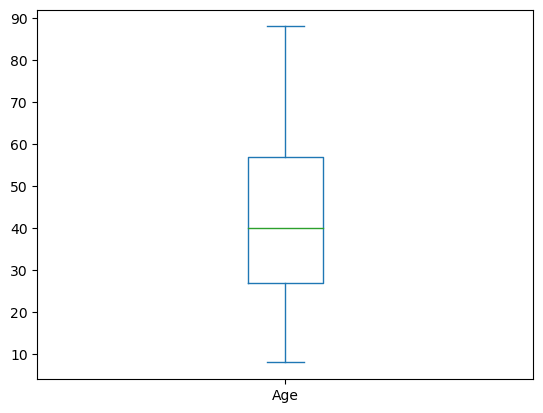

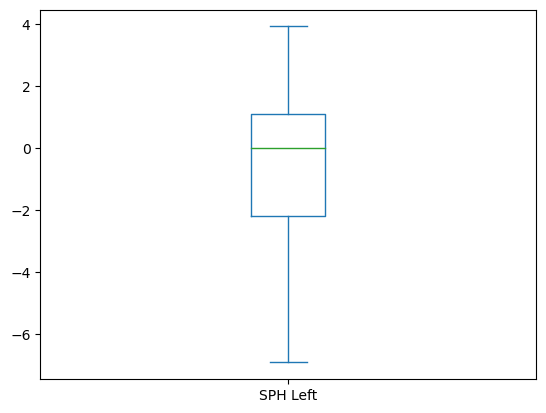

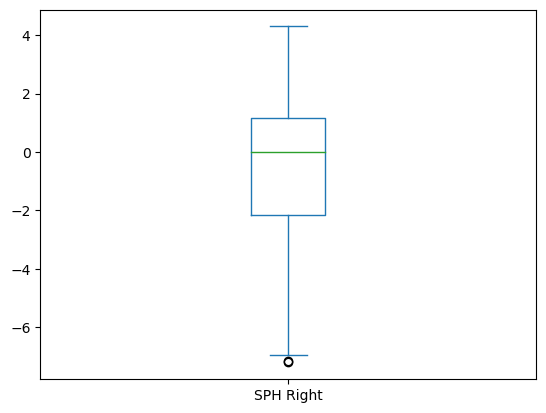

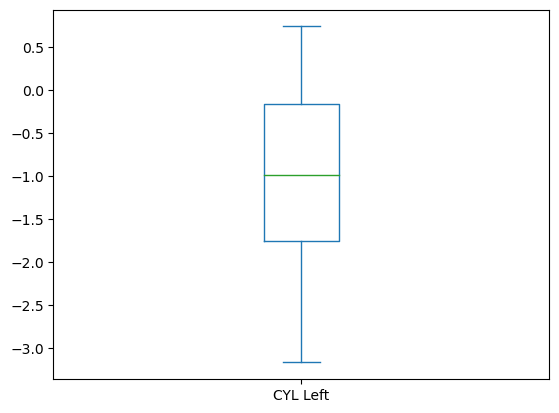

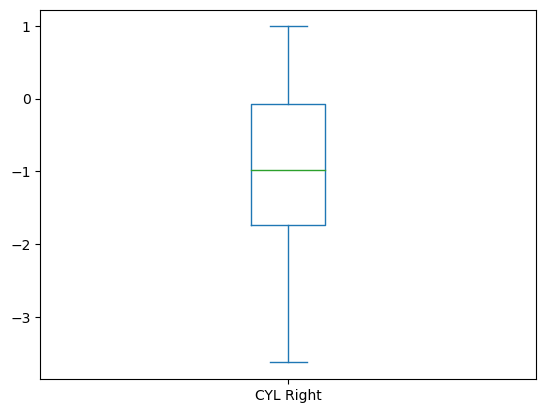

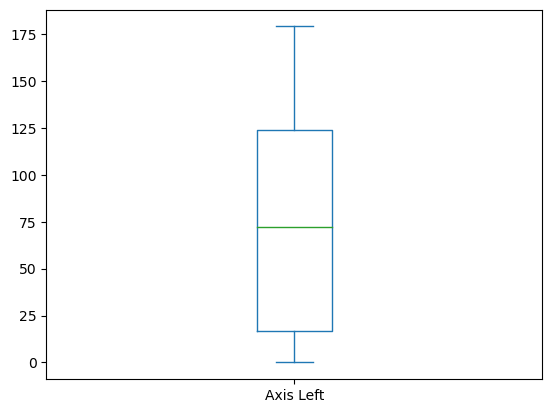

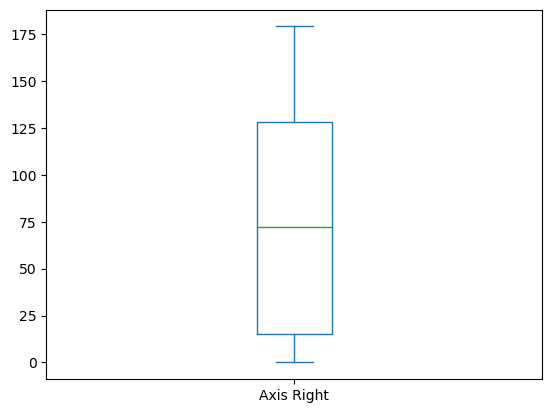

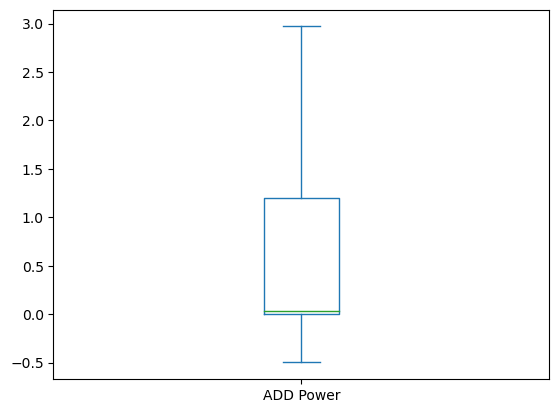

Age           None
SPH Left      None
SPH Right     None
CYL Left      None
CYL Right     None
Axis Left     None
Axis Right    None
ADD Power     None
dtype: object

In [9]:
def outliers(x):
    x.plot(kind='box')
    plt.show()
data.select_dtypes('number').apply(outliers)


# Data Cleaning

In [10]:
# Encode categorical variables using one-hot encoding
categorical_columns = ['Gender', 'Blurred Vision', 'Eye Strain', 'Headaches', 'Distance Issue', 
                        'Near Issue', 'Light Sensitivity', 'Difficulty in Low Light', 
                        'Recommended Lens Type', 'Snellen Score Left', 'Snellen Score Right']
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# Display the first few rows of the cleaned dataset
print(data_encoded.head())

   Age  SPH Left  SPH Right  CYL Left  CYL Right  Axis Left  Axis Right  \
0   29 -0.040975  -0.067445 -2.148485  -2.196849         99         161   
1   74  2.451255   2.749438 -2.322058  -2.387099         45          45   
2   39 -5.311282  -5.684078 -1.105738  -1.493765         59          28   
3   38 -1.644187  -1.748246 -1.774256  -2.133207        136          15   
4   36 -5.689527  -5.918066 -0.429863  -0.108784        172         132   

   ADD Power  Gender_Female  Gender_Male  ...  Snellen Score Left_20/50  \
0   0.000000              1            0  ...                         0   
1   0.866215              0            1  ...                         0   
2   0.000000              1            0  ...                         0   
3   0.000000              1            0  ...                         0   
4   0.000000              1            0  ...                         0   

   Snellen Score Left_20/70  Snellen Score Right_20/100  \
0                         0            

In [11]:
data_encoded

,Age,SPH Left,SPH Right,CYL Left,CYL Right,Axis Left,Axis Right,ADD Power,Gender_Female,Gender_Male,...,Snellen Score Left_20/50,Snellen Score Left_20/70,Snellen Score Right_20/100,Snellen Score Right_20/20,Snellen Score Right_20/200,Snellen Score Right_20/25,Snellen Score Right_20/30,Snellen Score Right_20/40,Snellen Score Right_20/50,Snellen Score Right_20/70
0,29,-0.040975,-0.067445,-2.148485,-2.196849,99,161,0.000000,1,0,...,0,0,0,1,0,0,0,0,0,0
1,74,2.451255,2.749438,-2.322058,-2.387099,45,45,0.866215,0,1,...,0,0,0,0,0,0,0,1,0,0
2,39,-5.311282,-5.684078,-1.105738,-1.493765,59,28,0.000000,1,0,...,0,0,0,0,1,0,0,0,0,0
3,38,-1.644187,-1.748246,-1.774256,-2.133207,136,15,0.000000,1,0,...,0,0,0,1,0,0,0,0,0,0
4,36,-5.689527,-5.918066,-0.429863,-0.108784,172,132,0.000000,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,71,0.736521,0.532851,-0.544985,-1.048406,47,174,2.385339,0,1,...,0,0,0,0,0,1,0,0,0,0
4996,29,0.030647,-1.150014,-0.540011,-0.278843,36,117,-0.052682,1,0,...,0,0,0,0,0,0,1,0,0,0
4997,18,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0,1,...,0,0,0,1,0,0,0,0,0,0
4998,31,-1.399204,-0.611881,-0.904421,-2.191190,98,26,-0.296576,1,0,...,0,0,0,1,0,0,0,0,0,0


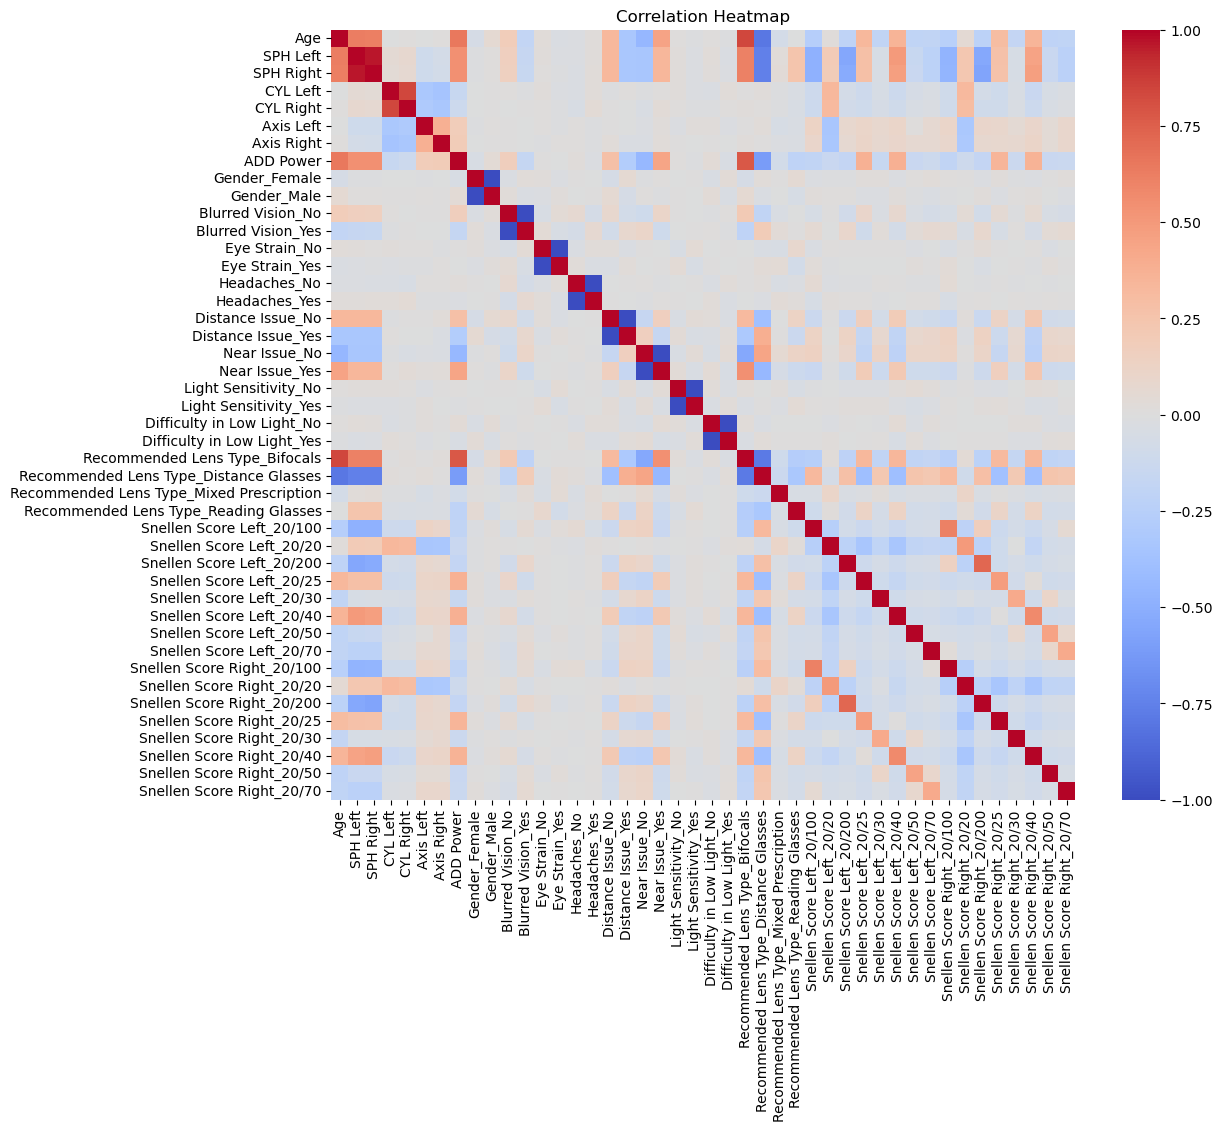

In [12]:
# Calculate correlation matrix
correlation_matrix = data_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

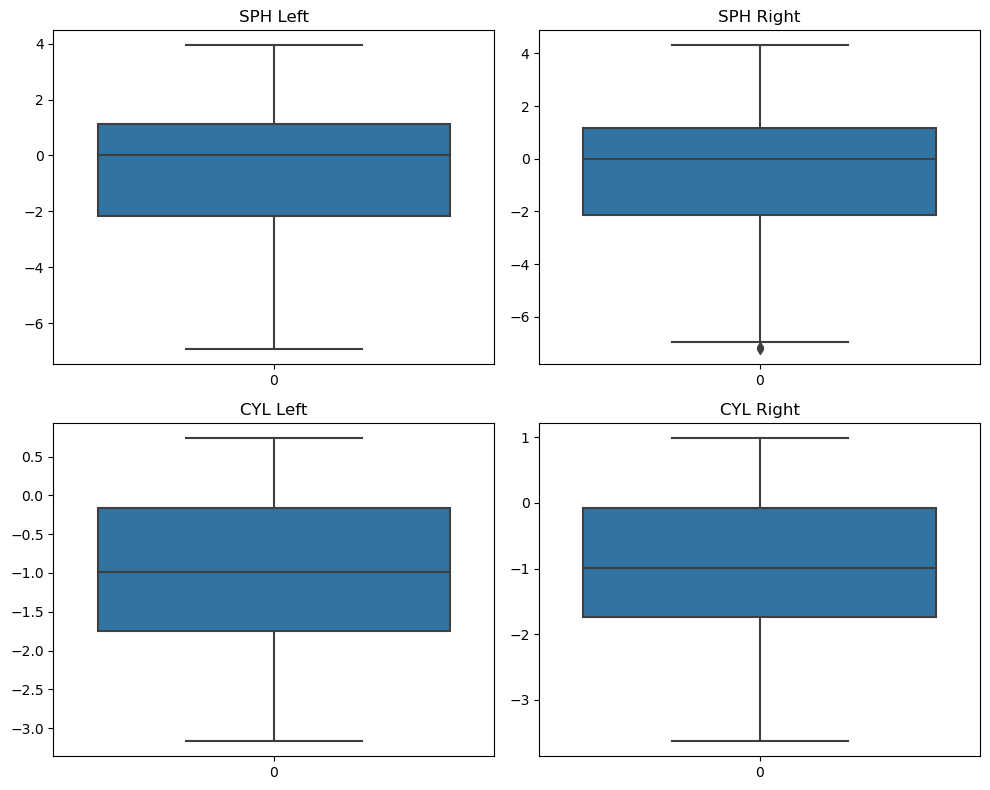

In [13]:
# Outliers
# Plotting boxplots for SPH and CYL values
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
sns.boxplot(data=data_encoded['SPH Left'])
plt.title('SPH Left')

plt.subplot(2, 2, 2)
sns.boxplot(data=data_encoded['SPH Right'])
plt.title('SPH Right')

plt.subplot(2, 2, 3)
sns.boxplot(data=data_encoded['CYL Left'])
plt.title('CYL Left')

plt.subplot(2, 2, 4)
sns.boxplot(data=data_encoded['CYL Right'])
plt.title('CYL Right')

plt.tight_layout()
plt.show()


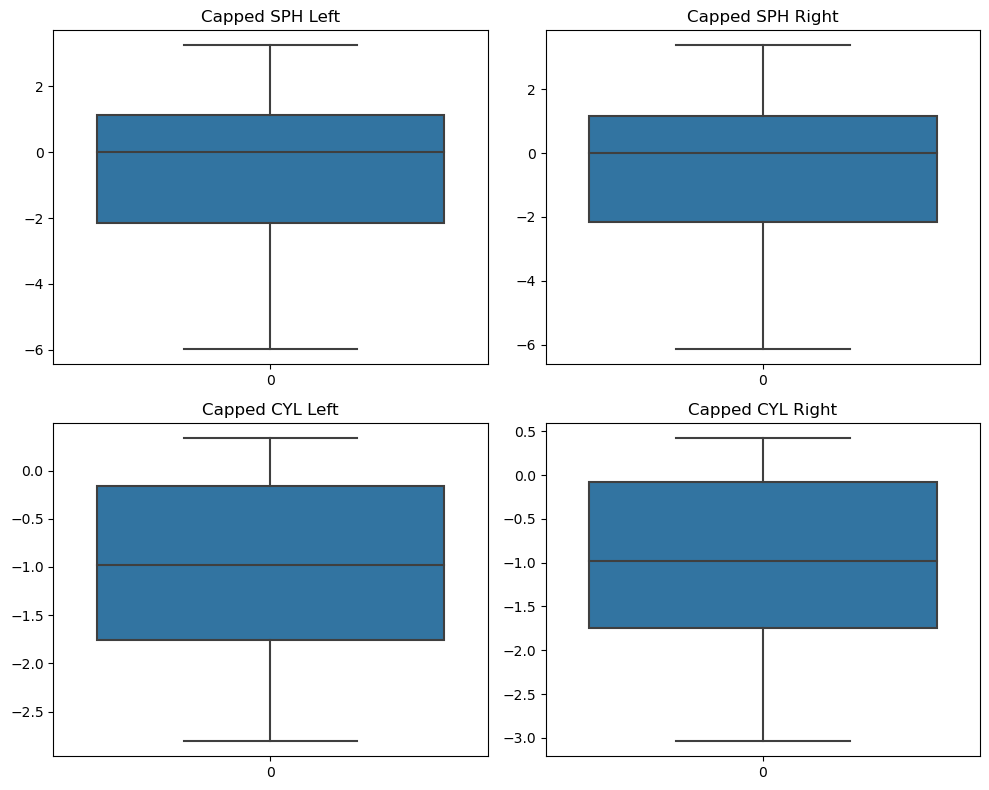

In [14]:
def cap_outliers(series):
    lower_bound = series.quantile(0.01)
    upper_bound = series.quantile(0.99)
    series = np.where(series < lower_bound, lower_bound, series)
    series = np.where(series > upper_bound, upper_bound, series)
    return series

# Apply capping to SPH and CYL columns
data_encoded['SPH Left'] = cap_outliers(data_encoded['SPH Left'])
data_encoded['SPH Right'] = cap_outliers(data_encoded['SPH Right'])
data_encoded['CYL Left'] = cap_outliers(data_encoded['CYL Left'])
data_encoded['CYL Right'] = cap_outliers(data_encoded['CYL Right'])

# Plot boxplots again to confirm capping
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
sns.boxplot(data=data_encoded['SPH Left'])
plt.title('Capped SPH Left')

plt.subplot(2, 2, 2)
sns.boxplot(data=data_encoded['SPH Right'])
plt.title('Capped SPH Right')

plt.subplot(2, 2, 3)
sns.boxplot(data=data_encoded['CYL Left'])
plt.title('Capped CYL Left')

plt.subplot(2, 2, 4)
sns.boxplot(data=data_encoded['CYL Right'])
plt.title('Capped CYL Right')

plt.tight_layout()
plt.show()


In [15]:
from xgboost import XGBRegressor


X = data_encoded.drop(columns=['SPH Left', 'SPH Right', 'CYL Left', 'CYL Right', 'Axis Left', 'Axis Right'])
y = data_encoded[['SPH Left', 'SPH Right', 'CYL Left', 'CYL Right', 'Axis Left', 'Axis Right']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [16]:
# Initialize and train the XGBoost regressor
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [17]:
# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R quared error: {r2}')

Mean Absolute Error: 12.882509771827033
Root Mean Squared Error: 28.604139383086455
R quared error: 0.49153656873647406


In [18]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R quared error: {r2}')

Mean Absolute Error: 12.715387721164745
Root Mean Squared Error: 26.993331967224382
R quared error: 0.4952475939815531


In [19]:
import joblib
joblib.dump(rf_model, "RandomForest_EyePrescription_Model.pkl")
print(" Model saved successfully as 'RandomForest_EyePrescription_Model.pkl'.")

 Model saved successfully as 'RandomForest_EyePrescription_Model.pkl'.


In [20]:
expected_features = rf_model.feature_names_in_
expected_features

array(['Age', 'ADD Power', 'Gender_Female', 'Gender_Male',
       'Blurred Vision_No', 'Blurred Vision_Yes', 'Eye Strain_No',
       'Eye Strain_Yes', 'Headaches_No', 'Headaches_Yes',
       'Distance Issue_No', 'Distance Issue_Yes', 'Near Issue_No',
       'Near Issue_Yes', 'Light Sensitivity_No', 'Light Sensitivity_Yes',
       'Difficulty in Low Light_No', 'Difficulty in Low Light_Yes',
       'Recommended Lens Type_Bifocals',
       'Recommended Lens Type_Distance Glasses',
       'Recommended Lens Type_Mixed Prescription',
       'Recommended Lens Type_Reading Glasses',
       'Snellen Score Left_20/100', 'Snellen Score Left_20/20',
       'Snellen Score Left_20/200', 'Snellen Score Left_20/25',
       'Snellen Score Left_20/30', 'Snellen Score Left_20/40',
       'Snellen Score Left_20/50', 'Snellen Score Left_20/70',
       'Snellen Score Right_20/100', 'Snellen Score Right_20/20',
       'Snellen Score Right_20/200', 'Snellen Score Right_20/25',
       'Snellen Score Right_20/3

In [22]:
import joblib
import numpy as np
import pandas as pd

rf_model = joblib.load("RandomForest_EyePrescription_Model.pkl")


valid_snellen_scores = ["20/20", "20/25", "20/30", "20/40", "20/50", "20/70", "20/100", "20/200"]


age = float(input("Enter Age: "))
gender = input("Enter Gender (Male/Female): ")
snellen_left = input("Enter Snellen Score for Left Eye (e.g., 20/40): ")
snellen_right = input("Enter Snellen Score for Right Eye (e.g., 20/30): ")


last_line_clear_left = input("Did you see the last line clearly for Left Eye? (Yes/No): ").strip().lower()
last_line_clear_right = input("Did you see the last line clearly for Right Eye? (Yes/No): ").strip().lower()

headache = input("Do you have headaches? (Yes/No): ")
blurry_vision = input("Do you have blurry vision? (Yes/No): ")
eye_strain = input("Do you have eye strain? (Yes/No): ")
distance_issue = input("Do you have distance vision issues? (Yes/No): ")
near_issue = input("Do you have near vision issues? (Yes/No): ")
light_sensitivity = input("Are you sensitive to light? (Yes/No): ")
low_light_difficulty = input("Do you have difficulty seeing in low light? (Yes/No): ")


expected_features = rf_model.feature_names_in_

input_df = pd.DataFrame(columns=expected_features)
input_df.loc[0] = 0  

input_df["Age"] = age


if f"Gender_{gender}" in input_df.columns:
    input_df[f"Gender_{gender}"] = 1

if f"Headaches_{headache}" in input_df.columns:
    input_df[f"Headaches_{headache}"] = 1

if f"Blurred Vision_{blurry_vision}" in input_df.columns:
    input_df[f"Blurred Vision_{blurry_vision}"] = 1

if f"Eye Strain_{eye_strain}" in input_df.columns:
    input_df[f"Eye Strain_{eye_strain}"] = 1

if f"Distance Issue_{distance_issue}" in input_df.columns:
    input_df[f"Distance Issue_{distance_issue}"] = 1

if f"Near Issue_{near_issue}" in input_df.columns:
    input_df[f"Near Issue_{near_issue}"] = 1

if f"Light Sensitivity_{light_sensitivity}" in input_df.columns:
    input_df[f"Light Sensitivity_{light_sensitivity}"] = 1

if f"Difficulty in Low Light_{low_light_difficulty}" in input_df.columns:
    input_df[f"Difficulty in Low Light_{low_light_difficulty}"] = 1

if snellen_left in valid_snellen_scores and f"Snellen Score Left_{snellen_left}" in input_df.columns:
    input_df[f"Snellen Score Left_{snellen_left}"] = 1

if snellen_right in valid_snellen_scores and f"Snellen Score Right_{snellen_right}" in input_df.columns:
    input_df[f"Snellen Score Right_{snellen_right}"] = 1

input_df = input_df.fillna(0)


prediction = rf_model.predict(input_df)


def recommend_lens_type(sph_left, sph_right, cyl_left, cyl_right, last_clear_left, last_clear_right):
    """
    Determine the lens type based on SPH, CYL, and the new last-line visibility condition.
    """
  
    if last_clear_left == "yes" :
        cyl_left,  0
        axis_left="Not Applicable"
    else:
        axis_left=prediction[0][4] 
        
    if last_clear_right == "yes" :
        cyl_right= 0
        axis_right="Not Applicable"
    else:
        axis_left=prediction[0][5]
        
    if sph_left < -0.50 or sph_right < -0.50:
        return "Distance Glasses", cyl_left, cyl_right, axis_left, axis_right  # Myopia (Nearsightedness)
    elif sph_left > +1.50 or sph_right > +1.50:
        return "Reading Glasses", cyl_left, cyl_right, axis_left, axis_right  # Hyperopia (Farsightedness)
    elif cyl_left < -1.00 or cyl_right < -1.00:
        return "Astigmatism Correction (Toric or Bifocals)", cyl_left, cyl_right, axis_left, axis_right
    else:
        return "Mixed Prescription (Mild Correction)", cyl_left, cyl_right, axis_left, axis_right



recommended_lens, cyl_left, cyl_right, axis_left, axis_right = recommend_lens_type(
    sph_left=prediction[0][0], 
    sph_right=prediction[0][1], 
    cyl_left=prediction[0][2], 
    cyl_right=prediction[0][3], 
    last_clear_left=last_line_clear_left,
    last_clear_right=last_line_clear_right
)


print("\n **Predicted Eye Prescription:**")
print(f"SPH Left: {prediction[0][0]:.2f}, SPH Right: {prediction[0][1]:.2f}")
print(f"CYL Left: {cyl_left:.2f}, CYL Right: {cyl_right:.2f}")
print(f"Axis Left: {axis_left}, Axis Right: {axis_right}")
print(f"🕶 **Recommended Lens Type: {recommended_lens}**")


Enter Age: 22
Enter Gender (Male/Female): Male
Enter Snellen Score for Left Eye (e.g., 20/40): 20/50
Enter Snellen Score for Right Eye (e.g., 20/30): 20/40
Did you see the last line clearly for Left Eye? (Yes/No): No
Did you see the last line clearly for Right Eye? (Yes/No): Yes
Do you have headaches? (Yes/No): No
Do you have blurry vision? (Yes/No): Yes
Do you have eye strain? (Yes/No): Yes
Do you have distance vision issues? (Yes/No): No
Do you have near vision issues? (Yes/No): No
Are you sensitive to light? (Yes/No): No
Do you have difficulty seeing in low light? (Yes/No): No

✅ **Predicted Eye Prescription:**
SPH Left: -1.93, SPH Right: -1.84
CYL Left: -1.26, CYL Right: 0.00
Axis Left: 82.54149587183885, Axis Right: Not Applicable
🕶 **Recommended Lens Type: Distance Glasses**
